In [1]:
%%bash
python --version

Python 3.10.1


In [2]:
%%bash
conda env list

# conda environments:
#
                         /home/aji/anaconda2
                         /home/aji/anaconda2/envs/coevolution
base                     /home/aji/anaconda3
bmi219p                  /home/aji/anaconda3/envs/bmi219p
minipynetp               /home/aji/anaconda3/envs/minipynetp
openpyxl                 /home/aji/anaconda3/envs/openpyxl
pynetp                   /home/aji/anaconda3/envs/pynetp
pynetp3.10.0          *  /home/aji/anaconda3/envs/pynetp3.10.0
pytorch                  /home/aji/anaconda3/envs/pytorch
sciProj                  /home/aji/anaconda3/envs/sciProj
testenv                  /home/aji/anaconda3/envs/testenv
xlrd                     /home/aji/anaconda3/envs/xlrd
                         /home/aji/yes



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from pathlib import Path
from typing import Any, NewType
DataFrame = NewType('DataFrame', Any)

In [4]:
def load_biogrid_v4_4():
    dpath = Path("../data/biogrid/BIOGRID-ALL-4.4.206.tab3.txt")
    biogrid_df : DataFrame = pd.read_csv(dpath, sep="\t")
    return biogrid_df

def drop_columns(biogrid_df: DataFrame):
    to_drop = ['BioGRID ID Interactor A',
               'BioGRID ID Interactor B',
               'Systematic Name Interactor A',
               'Systematic Name Interactor B',
               'Official Symbol Interactor A',
               'Official Symbol Interactor B',
               'Synonyms Interactor A',
               'Synonyms Interactor B',
               'Modification',
               'Throughput',
               'Score',
               'Qualifications',
               'Tags',
               'Source Database',
               'SWISS-PROT Accessions Interactor A',
               'TREMBL Accessions Interactor A',
               'REFSEQ Accessions Interactor A',
               'SWISS-PROT Accessions Interactor B',
               'TREMBL Accessions Interactor B',
               'REFSEQ Accessions Interactor B',
               'Ontology Term IDs',
               'Ontology Term Names',
               'Ontology Term Categories',
               'Ontology Term Qualifier IDs',
               'Ontology Term Qualifier Names',
               'Ontology Term Types'
               ]
    d = biogrid_df.drop(columns=to_drop, inplace=False)
    return d

def filter_missing_entrez_interactors(d):
    d = d[d['Entrez Gene Interactor A'] != "-"]
    d = d[d['Entrez Gene Interactor B'] != "-"]
    return d

def get_frequency(col):
    freq_dict = {}
    for label in col:
        if label not in freq_dict:
            freq_dict[label]=0
        else:
            freq_dict[label] += 1
    return freq_dict

def plot_freq(d, colname):
    col = d[colname]
    freq_dic = get_frequency(col)

def get_physical(d):
    t = d['Experimental System Type'] == 'physical'
    d = d[t]
    return d


def plot_physical_experiments(d):
    d = get_physical(d)
    plot_col(d, 'Experimental System', topn=20)
        

def prepare_biogrid():
    d = load_biogrid_v4_4()
    d = drop_columns(d)
    d = filter_missing_entrez_interactors(d)
    return d
    


def plot_col(d, colname, titlename=None, topn=12):
    
    freq_dict = get_frequency(d[colname])
    freq_dict = dict(sorted(freq_dict.items(), key= lambda x: x[1], reverse=True))

    vals = list(freq_dict.values())[0:topn]
    keys = list(freq_dict.keys())[0:topn]

    #color = np.arange(len(keys))
    plt.barh(keys, vals)
    if titlename:
        plt.title(titlename)
    #plt.legend(keys)
    plt.show()
    
def load_tip49_spec_counts_dataset():
    data = Path("../data")
    apms = data / "apms"
    saint = apms / "20110108_NATUREMETHODS_8_1_SAINTProbabilisticScoringOfAffinityPurification"
    tip49 = saint / "tip49_supp2.A._Interactions.csv"
    tip49 = pd.read_csv(tip49)
    tip49 = tip49.rename(columns=tip49.iloc[1])
    tip49 = tip49.iloc[2:, 1:]
    
    #print(tip49.columns[1])
    assert tip49.columns[1] == "Prey"
    return tip49

In [5]:
d = prepare_biogrid()

/tmp/ipykernel_136596/2419981315.py:67: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  d = load_biogrid_v4_4()


In [6]:
for col in d: print(col, sum(d[col] == "-"))

#BioGRID Interaction ID 0
Entrez Gene Interactor A 0
Entrez Gene Interactor B 0
Experimental System 0
Experimental System Type 0
Author 0
Publication Source 0
Organism ID Interactor A 0
Organism ID Interactor B 0
Organism Name Interactor A 0
Organism Name Interactor B 0


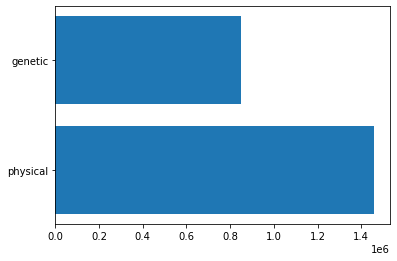

In [7]:
plot_col(d,'Experimental System Type' )

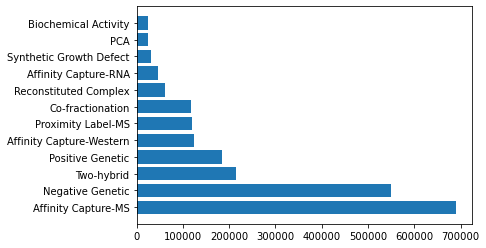

In [8]:
plot_col(d, 'Experimental System', topn=12)

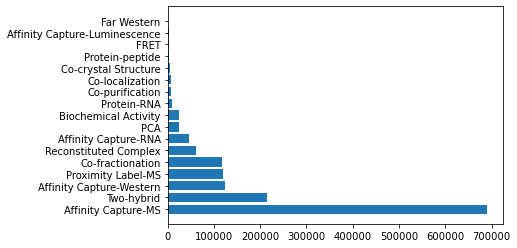

In [9]:
plot_physical_experiments(d)

In [13]:
%%bash
ls ../data/apms/20110108_NATUREMETHODS_8_1_SAINTProbabilisticScoringOfAffinityPurification

check_psv.sh
dub_supp3.A._Interactions.csv
dub_supp3.B._GO_SAINT.csv
dub_supp3.C._GO_D-score_(CompPASS).csv
dub_supp3.D._GO_Z-score_(CompPASS).csv
dub_supp3.xls
excel_write_tool.py
NIHMS252278-supplement-4.Interaction.csv
NIHMS252278-supplement-4.xls
tip49_supp2.A._Interactions.csv
tip49_supp2.B._Control_data_(35_->_9).csv
tip49_supp2.C._Control_merge_table.csv
tip49_supp2.D.GO_terms.csv
tip49_supp2.xls
write_data.py


In [61]:
spec_counts_df = load_tip49_spec_counts_dataset()

In [64]:
spec_counts_df

,Bait,Prey,IP,Spec,ctrlCounts,SAINT,PP-NSAF,Z-score,weighted D-score
2,ACTR5,ACTR5,ARP5,417,0|0|0|0|0|0|0|0|0,1,0.697316352520067,4.93341427067021,7.32386764271932
3,ACTR5,RUVBL2,ARP5,73,6|0|1|0|0|0|0|0|0,1,0.033910239152529,-0.277434577751575,2.30143615423011
4,ACTR5,RUVBL1,ARP5,50,3|2|0|0|0|0|0|2|0,1,0.0188476130319074,-0.445655245594782,1.6953802173525
5,ACTR5,INO80C,ARP5,26,0|0|0|0|0|0|0|0|0,0.99,0.17716503039295,2.47752757446183,2.16103341761436
6,ACTR5,ACTR8,ARP5,32,0|0|0|0|0|0|0|0|0,1,0.0326314267664079,0.101163744000279,2.1299377904367
...,...,...,...,...,...,...,...,...,...
5518,ZNHIT2,ZNHIT2,ZnF.HIT2,358,0|0|0|0|0|0|0|0|0,1,0.95751746168747,5.00260255351579,13.7777734271275
5519,ZNHIT2,C20orf4,ZnF.HIT2,4,0|0|0|0|0|0|0|0|0,0.97,1,5.00370233297676,1.7133212483779
5520,ZNHIT2,TSSC4,ZnF.HIT2,4,0|0|0|0|0|0|0|0|0,0.98,1,5.00370233297676,1.7133212483779
5521,ZNHIT2,TTC27,ZnF.HIT2,9,0|0|0|0|0|0|0|0|0,0.99,1,5.00370233297676,2.42300214615802
